### 1. The necessary libraries were imported

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

### 2. The ETF symbols for this analysis were downloaded from Yahoo Finance

In [7]:
ETF_symbols=["SPY","XLE","XLF","XLI","XLK","XLY","XLU","XLV","XLP","XLRE","XLB"]
ETF_data={}
start_date="2021-01-01"
end_date="2024-01-01"

for ticker in ETF_symbols:
    data=yf.download(ticker,start=start_date,end=end_date)
    ETF_data[ticker]=data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 3. The downloaded data for each ETF was displayed

In [9]:
for ticker in ETF_symbols:
    data = ETF_data[ticker]
    print("\nTicker:",ticker,"\n",data.head())


Ticker: SPY 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  375.309998  375.450012  364.820007  368.790009  350.543549   
2021-01-05  368.100006  372.500000  368.049988  371.329987  352.957886   
2021-01-06  369.709991  376.980011  369.119995  373.549988  355.068085   
2021-01-07  376.100006  379.899994  375.910004  379.100006  360.343475   
2021-01-08  380.589996  381.489990  377.100006  381.260010  362.396606   

               Volume  
Date                   
2021-01-04  110210800  
2021-01-05   66426200  
2021-01-06  107997700  
2021-01-07   68766800  
2021-01-08   71677200  

Ticker: XLE 
                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  38.340000  38.660000  37.509998  37.959999  33.016140  33858800
2021-01-05  38.369999  40.700001  38.340000  39.660000 

### 4. A line graph was constructed to visually compare the adjusted close prices of the ETFs

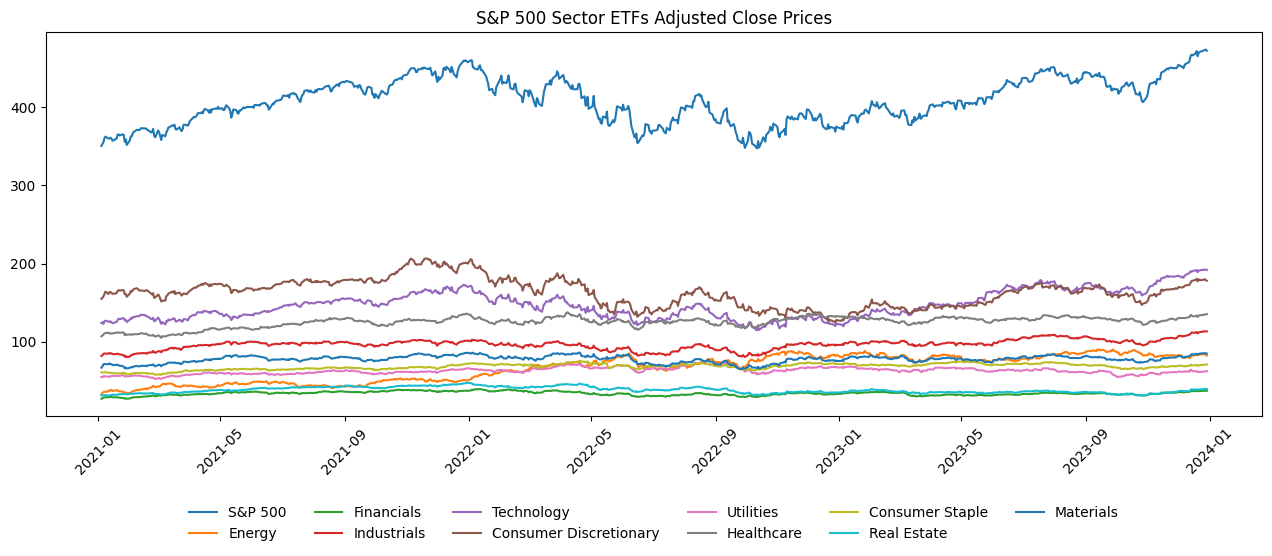

In [41]:
for ticker in ETF_symbols:
    data = ETF_data[ticker]
    ETF_Price=data['Adj Close']
    plt.plot(ETF_Price,label=ticker)
    plt.xticks(rotation=45)
    plt.style.use('default')
    plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)
    new_labels=['S&P 500','Energy', 'Financials', 'Industrials','Technology','Consumer Discretionary','Utilities','Healthcare','Consumer Staple','Real Estate','Materials']
    plt.title('S&P 500 Sector ETFs Adjusted Close Prices', fontsize=12)
    plt.legend(new_labels,ncol=6,loc='upper center',bbox_to_anchor=(0.5, -0.2), frameon=False)

plt.show()



### 5. The returns of the ETFs were calculated and concatonated into one table to create a correlation matrix

In [13]:
df_list=[]
for ticker in ETF_symbols:
    data = ETF_data[ticker]
    data["Returns"] = data["Adj Close"].pct_change()*100
    ETF_returns=data["Returns"].dropna()
    returns_df=pd.DataFrame({f"{ticker} Returns":ETF_returns})
    df_list.append(returns_df)
    
combined_df=pd.concat(df_list,axis=1)
print(combined_df)


            SPY Returns  XLE Returns  XLF Returns  XLI Returns  XLK Returns  \
Date                                                                          
2021-01-05     0.688741     4.478403     0.447040     0.983671     0.648927   
2021-01-06     0.597861     3.050919     4.416303     2.383681    -1.724524   
2021-01-07     1.485741     1.468063     1.442628     0.548460     2.695425   
2021-01-08     0.569771    -0.120557    -0.064638    -0.244897     0.646560   
2021-01-11    -0.674088     1.569282     0.323425    -0.033485    -0.825949   
...                 ...          ...          ...          ...          ...   
2023-12-22     0.200971     0.295052     0.214703     0.479615     0.130349   
2023-12-26     0.422253     0.859013     0.401728     0.707153     0.416553   
2023-12-27     0.180806    -0.443342     0.320078     0.149211    -0.005192   
2023-12-28     0.037774    -1.523506     0.292482     0.026295     0.119277   
2023-12-29    -0.289498    -0.226117    -0.318137   

### 6. A correlation matrix was constructed to identify the relationships between the performances of the Sector ETFs from 1 January 2021 to 1 January 2024

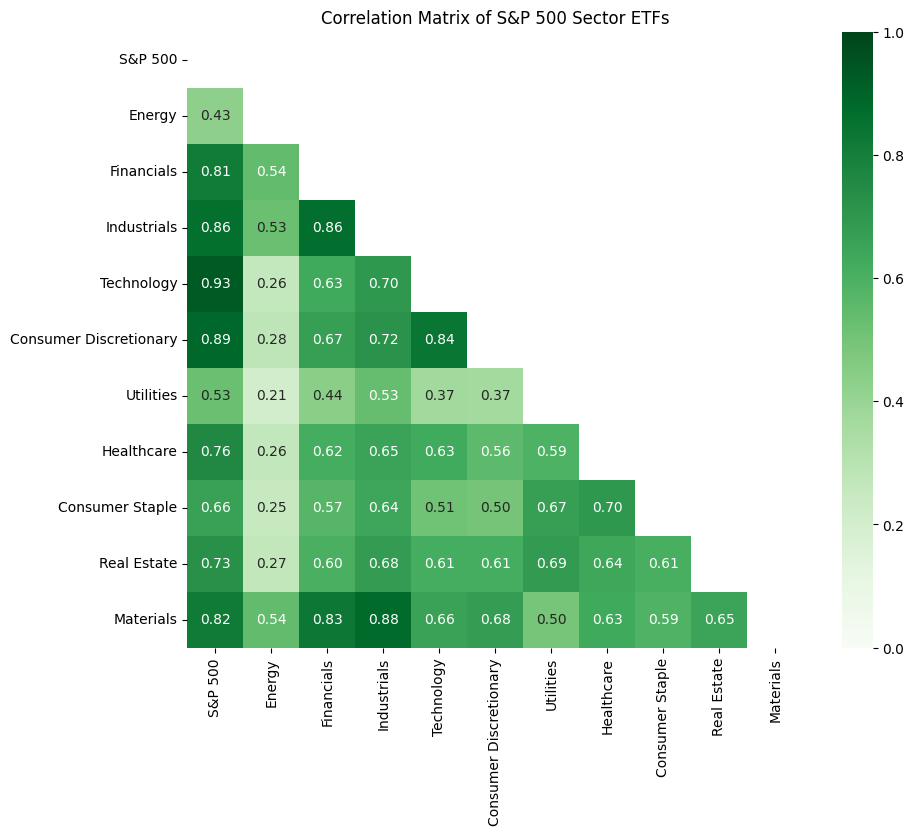

In [37]:
combined_df.rename(columns={'SPY Returns': 'S&P 500','XLE Returns': 'Energy','XLF Returns': 'Financials','XLI Returns': 'Industrials'
                          ,'XLK Returns': 'Technology','XLY Returns': 'Consumer Discretionary','XLU Returns': 'Utilities'
                          ,'XLV Returns': 'Healthcare','XLP Returns': 'Consumer Staple','XLRE Returns': 'Real Estate'
                          ,'XLB Returns': 'Materials'}, inplace=True)
column_titles=returns_df.columns.tolist()
fig, ax = plt.subplots(figsize=(10,8))
corr_matrix=combined_df.corr()
mask_=np.triu(np.ones_like(corr_matrix,dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', vmin=0, vmax=1,square=True,fmt=".2f",mask=mask_)
plt.title('Correlation Matrix of S&P 500 Sector ETFs', fontsize=12)
plt.show()